## K-Fold Cross Validation & GridSearch

### AIS Data – Activity Classification – Demo Data Extracated from Main Data

In [1]:
#### INPUTS (X): VesselName, MMSI, VesselType, Length, Width, SOG
##### MMSI --> Maritime Mobile Service Identity --> nine digits ID
##### SOG --> Speed Over Ground
##### OUTPUT (y): Status
#####             0 - 'engaged in fishing‘
#####             1 - 'under way using engine‘
#####             2 - 'undefined‘
#####             3 - 'at anchor'

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('AIS_2017_01_Zone01.csv')
dataset.head()

,VesselName,MMSI,VesselType,Length,Width,SOG,Status
0,ALEUTIAN NO 1,366988820,1001,37.22,9.73,9.2,engaged in fishing
1,ALEUTIAN NO 1,366988820,1001,37.22,9.73,9.6,engaged in fishing
2,ALEUTIAN NO 1,366988820,1001,37.22,9.73,9.3,engaged in fishing
3,ALEUTIAN NO 1,366988820,1001,37.22,9.73,9.5,engaged in fishing
4,ALEUTIAN NO 1,366988820,1001,37.22,9.73,9.6,engaged in fishing


In [4]:
dataset.tail()

,VesselName,MMSI,VesselType,Length,Width,SOG,Status
9952,WESTWOOD PACIFIC,211517000,1004,183.2,29.94,13.0,under way using engine
9953,WESTWOOD PACIFIC,211517000,1004,183.2,29.94,13.1,under way using engine
9954,WESTWOOD PACIFIC,211517000,1004,183.2,29.94,13.1,under way using engine
9955,WESTWOOD PACIFIC,211517000,1004,183.2,29.94,13.1,under way using engine
9956,WESTWOOD PACIFIC,211517000,1004,183.2,29.94,13.1,under way using engine


In [5]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(y[0:3])

['engaged in fishing' 'engaged in fishing' 'engaged in fishing']


In [6]:
## Categories
# {'engaged in fishing','under way using engine','undefined','at anchor'}
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y[0:3])

[1 1 1]


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Applying PCA after selecting no of components
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='scale')
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 247    0    0    0]
 [   0  189    0    1]
 [   0    0  635    0]
 [   1    1    0 1416]]


### k-Fold Cross Validation

In [13]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
# K Fold == 10 Fold
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9991964282509842

In [14]:
accuracies.std()

0.0008887430295996824

### Grid Search

In [15]:
# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#               {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = 1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# # About 1 Hour [Intel i7, 16 GB RAM] --> {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [16]:
# More Optimizing
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.8,0.9], 'kernel': ['rbf'], 'gamma': [0.09, 0.1]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = 1)
# n_jobs = - 1 uses all processors 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

grid_search = grid_search.fit(X_train, y_train)
best_accuracy2 = grid_search.best_score_

In [17]:
best_parameters2 = grid_search.best_params_
# {'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}

In [18]:
best_parameters2

{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}

In [19]:
best_accuracy2

0.9991964282509842

In [20]:
# Need to reset to BEST PARAMETERS
classifier = SVC(C = 0.8, kernel = 'rbf', gamma = 0.1,random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=0.8, gamma=0.1, random_state=0)

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [22]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 247,    0,    0,    0],
       [   0,  189,    0,    1],
       [   0,    0,  635,    0],
       [   1,    1,    0, 1416]], dtype=int64)

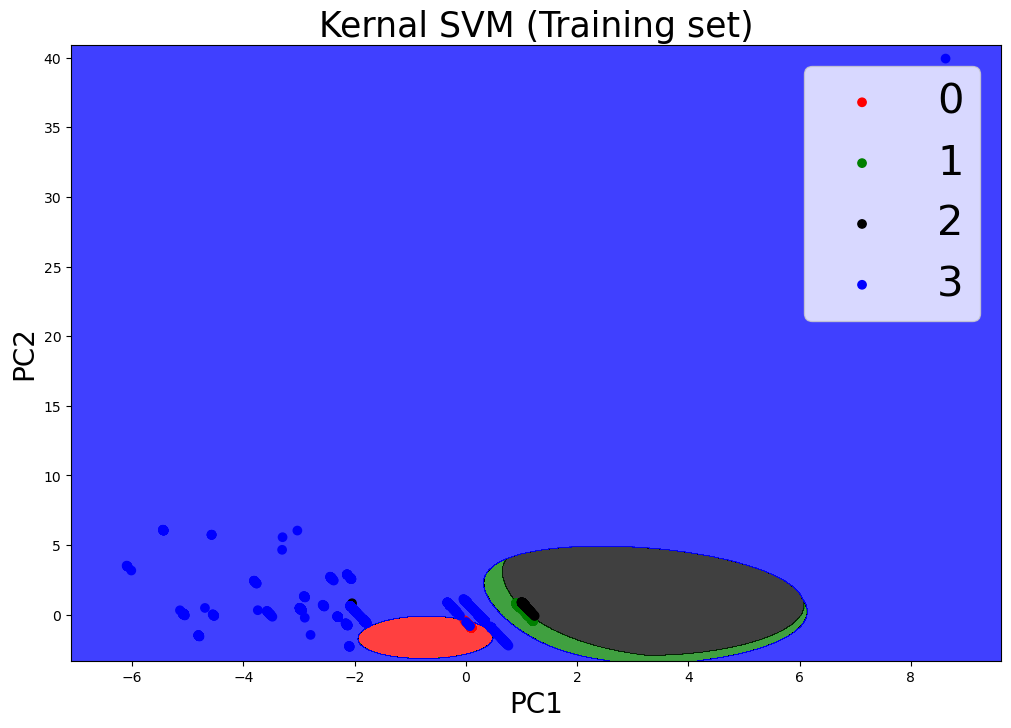

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','black','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = np.array(['red', 'green','black','blue'])
for i, j in enumerate(np.unique(y_set)):
    X1=X_set[y_set == j, 0]
    X2=X_set[y_set == j, 1]
    cArray = np.full(X1.shape, i)  
    plt.scatter(X1, X2, c = colors[cArray], label = j)
    
plt.title('Kernal SVM (Training set)',fontsize=25)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

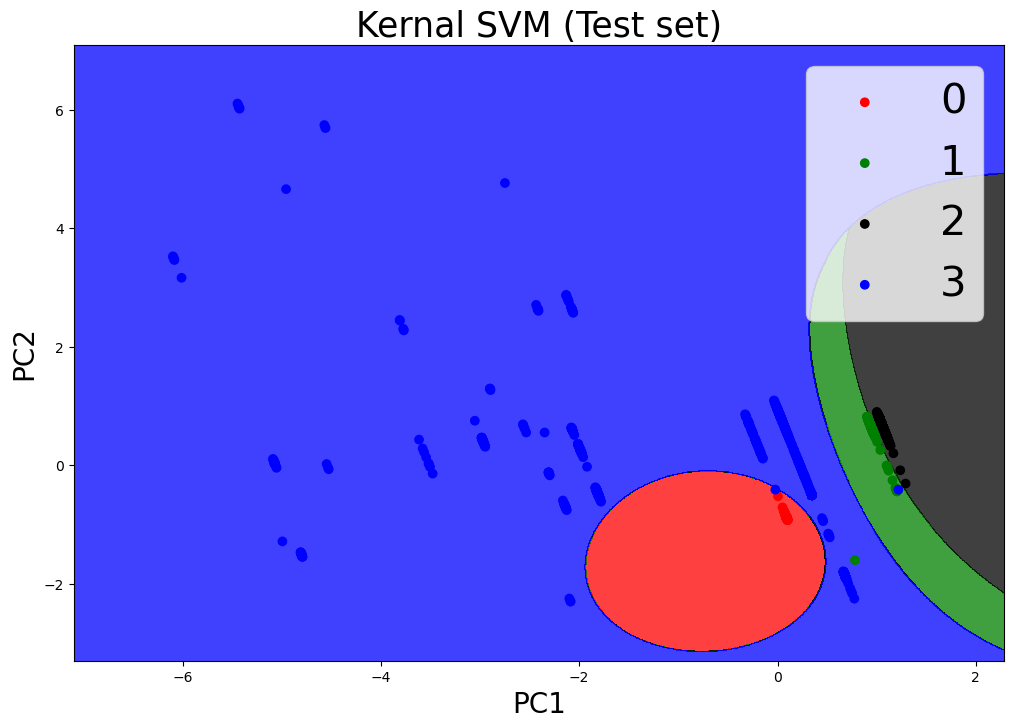

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','black','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = np.array(['red', 'green','black','blue'])
for i, j in enumerate(np.unique(y_set)):
    X1=X_set[y_set == j, 0]
    X2=X_set[y_set == j, 1]
    cArray = np.full(X1.shape, i)  
    plt.scatter(X1, X2, c = colors[cArray], label = j)
    
plt.title('Kernal SVM (Test set)',fontsize=25)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()